In [54]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('/Users/aarushsingh/Downloads/Data Science/ML/economic_index.csv')

In [55]:
df.head(5)

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [56]:
df.drop(columns=['Unnamed: 0','year', 'month'],axis=1,inplace=True)

In [57]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [58]:
df.columns

Index(['interest_rate', 'unemployment_rate', 'index_price'], dtype='object')

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   interest_rate      24 non-null     float64
 1   unemployment_rate  24 non-null     float64
 2   index_price        24 non-null     int64  
dtypes: float64(2), int64(1)
memory usage: 708.0 bytes


In [60]:
df.describe()

,interest_rate,unemployment_rate,index_price
count,24.000000,24.00000,24.000000
mean,2.072917,5.77500,1070.083333
std,0.349527,0.33002,210.735341
min,1.750000,5.30000,704.000000
25%,1.750000,5.50000,928.250000
50%,2.000000,5.85000,1061.000000
75%,2.500000,6.10000,1239.000000
max,2.750000,6.20000,1464.000000


In [61]:
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

In [62]:
df.tail()

,interest_rate,unemployment_rate,index_price
19,1.75,6.1,866
20,1.75,5.9,876
21,1.75,6.2,822
22,1.75,6.2,704
23,1.75,6.1,719


<Axes: >

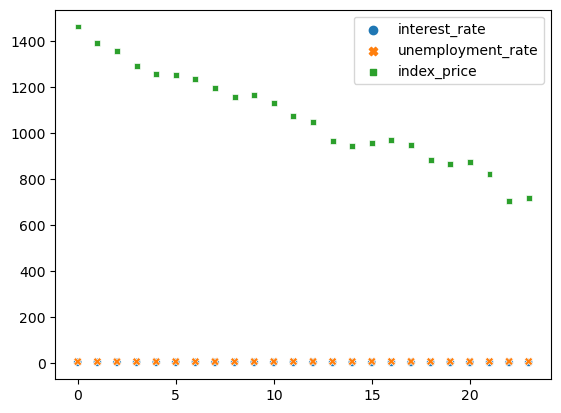

In [63]:
sns.scatterplot(df)

/Library/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


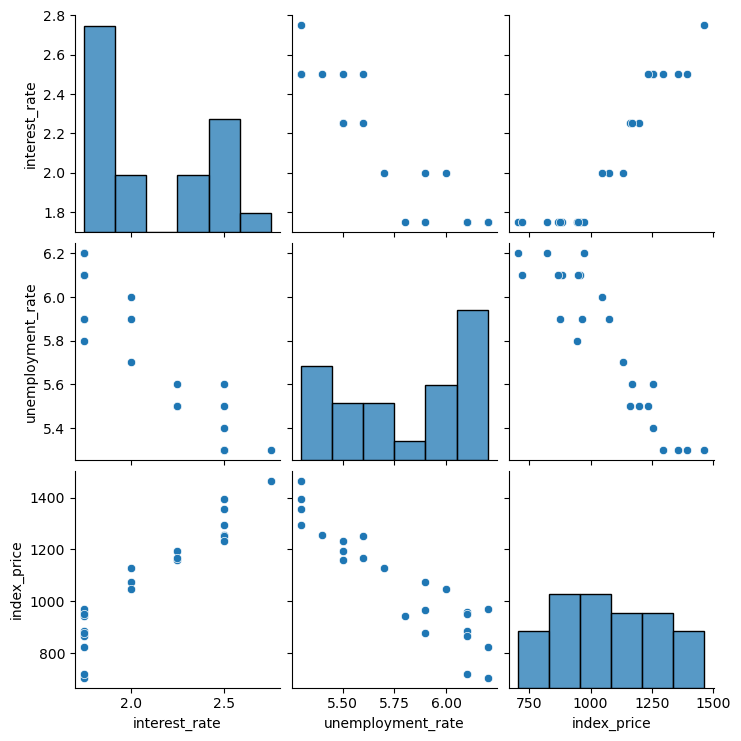

In [64]:
sns.pairplot(df)

In [65]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


In [66]:
df.cov()

,interest_rate,unemployment_rate,index_price
interest_rate,0.122169,-0.106793,68.928442
unemployment_rate,-0.106793,0.108913,-64.145652
index_price,68.928442,-64.145652,44409.384058


Text(0, 0.5, 'Unemployment_rate')

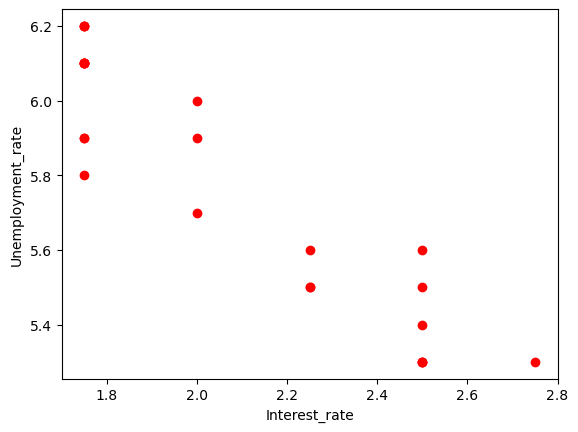

In [67]:
plt.scatter(df['interest_rate'],df['unemployment_rate'],color='red')
plt.xlabel('Interest_rate')
plt.ylabel('Unemployment_rate')

In [68]:
X=df[['interest_rate','unemployment_rate']]
y=df['index_price']

In [69]:
X.shape,y.shape


((24, 2), (24,))

In [70]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=43)

<Axes: xlabel='interest_rate', ylabel='index_price'>

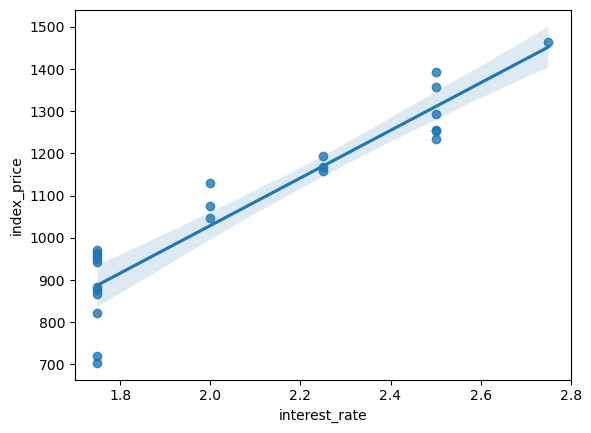

In [71]:
sns.regplot(x='interest_rate', y='index_price', data=df)

In [72]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [73]:
X_train= scaler.fit_transform(X_train)
X_test= scaler.fit_transform(X_test)

In [74]:
print(X,X_train,X_test)

    interest_rate  unemployment_rate
0            2.75                5.3
1            2.50                5.3
2            2.50                5.3
3            2.50                5.3
4            2.50                5.4
5            2.50                5.6
6            2.50                5.5
7            2.25                5.5
8            2.25                5.5
9            2.25                5.6
10           2.00                5.7
11           2.00                5.9
12           2.00                6.0
13           1.75                5.9
14           1.75                5.8
15           1.75                6.1
16           1.75                6.2
17           1.75                6.1
18           1.75                6.1
19           1.75                6.1
20           1.75                5.9
21           1.75                6.2
22           1.75                6.2
23           1.75                6.1 [[ 0.48507125 -0.75327865]
 [-0.24253563  0.68916982]
 [-0.24253563  0.4006

In [75]:
print(X_train,X_test)

[[ 0.48507125 -0.75327865]
 [-0.24253563  0.68916982]
 [-0.24253563  0.40068013]
 [ 1.21267813 -1.33025803]
 [ 0.48507125 -0.46478895]
 [-0.9701425   0.97765952]
 [ 1.21267813 -1.33025803]
 [-0.9701425   1.26614921]
 [ 0.48507125 -0.75327865]
 [-0.9701425   0.40068013]
 [-0.9701425   0.11219044]
 [ 1.21267813 -1.33025803]
 [-0.9701425   1.26614921]
 [-0.9701425   0.97765952]
 [-0.9701425   1.26614921]
 [-0.9701425   0.97765952]
 [ 1.940285   -1.33025803]
 [ 1.21267813 -1.04176834]] [[ 1.36438208 -1.35369395]
 [-0.12403473 -0.49872935]
 [ 1.36438208 -0.92621165]
 [-0.86824314  0.35623525]
 [-0.86824314  1.21119985]
 [-0.86824314  1.21119985]]


In [76]:
print(X_test)


[[ 1.36438208 -1.35369395]
 [-0.12403473 -0.49872935]
 [ 1.36438208 -0.92621165]
 [-0.86824314  0.35623525]
 [-0.86824314  1.21119985]
 [-0.86824314  1.21119985]]


In [89]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [90]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(model,X_train,y_train,scoring='neg_mean_squared_error',cv=15)

In [91]:
score.mean()

-5428.265524744463

In [92]:
modely_pred = model.predict(X_test)

In [93]:
modely_pred

array([1359.57733232, 1084.4316869 , 1338.3069643 ,  925.58849618,
        883.04776015,  883.04776015])

In [96]:
## Performance Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(y_test,modely_pred)
mae=mean_absolute_error(y_test,modely_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)



9839.429047182817
88.97735225711983
99.1938962193885


In [95]:
from sklearn.metrics import r2_score
score=r2_score(y_test,modely_pred)
print(score)
#display adjusted R-squared
print(1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

0.7145996995496197
0.5243328325826995


In [97]:
## OLS Linear Regression
import statsmodels.api as sm
model=sm.OLS(y_train,X_train).fit()

In [99]:
model.summary()

/Library/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.034
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2845
Date:                Fri, 23 May 2025   Prob (F-statistic):                       0.756
Time:                        16:56:05   Log-Likelihood:                         -151.28
No. Observations:                  18   AIC:                                      306.6
Df Residuals:                      16   BIC:                                      308.3
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           156.2767    796.289      0.196      0.847   -1531.781    1844.334
x2           -49.7573    796.289     -0.062      0.951   -1737.815    1638.300
==============================================================================
Omnibus:                        5.004   Durbin-Watson:                   0.004
Prob(Omnibus):                  0.082   Jarque-Bera (JB):                2.553
Skew:                          -0.726   Prob(JB):                        0.279
Kurtosis:                       4.138   Cond. No.                         5.72
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Assumption


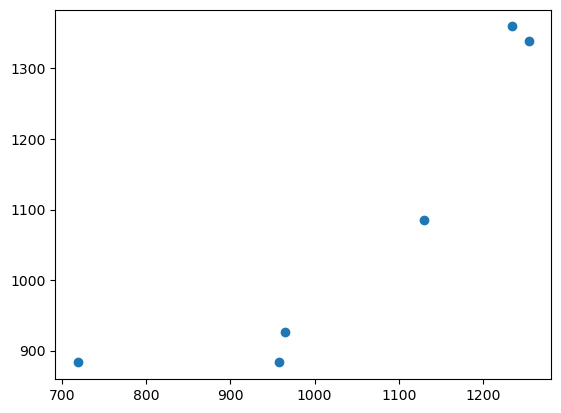

In [101]:
plt.scatter(y_test,modely_pred)

In [103]:
residuals=y_test-modely_pred
print(residuals)

6    -125.577332
10     45.568313
5     -84.306964
13     39.411504
23   -164.047760
15     74.952240
Name: index_price, dtype: float64


/Library/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


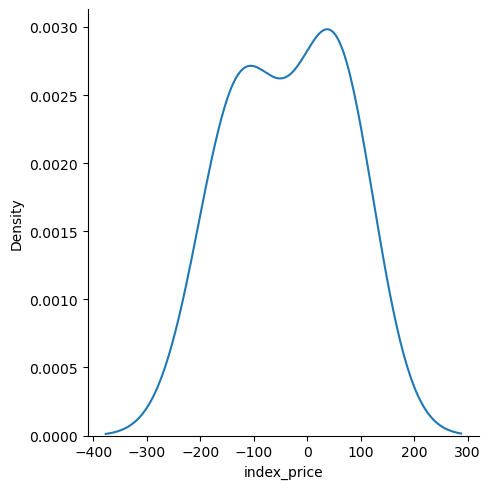

In [104]:
## Plot this residuals
sns.displot(residuals,kind='kde')

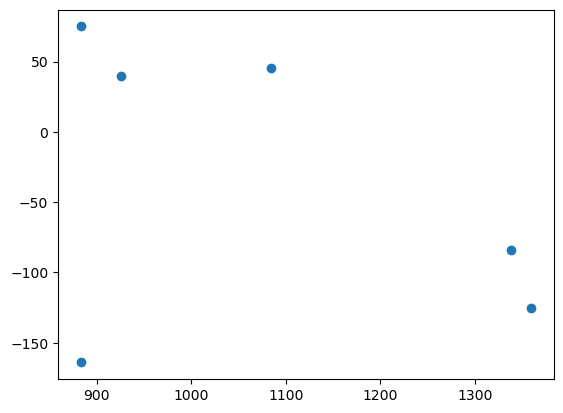

In [106]:
## scatter plot with respect to prediction and residuals
plt.scatter(modely_pred,residuals)